# Upward recursion

We will evaluate bessel upward recursion using the formula

\begin{equation}
j_{l+1}(x) = \frac{2i+1}{x} j_l - j_{l-1}
\end{equation}

In [9]:
from scipy import *
from numpy import *

def bessel_upward(l,x):
    "returns array of j_i from i=0 to i=l, including l"
    res = zeros(l+1)
    if abs(x)<1e-30:
        res[0]=1.
        return res
    j0 = sin(x)/x
    res[0]=j0
    if l==0: return res
    j1 = j0/x - cos(x)/x
    res[1] = j1
    
    for i in range(1,l):
        j2 = (2*i+1)/x*j1 - j0
        res[i+1]=j2
        j0,j1 = j1,j2
        
    return res

In [10]:
from scipy import special

l=10
x=0.1

dat0 = bessel_upward(l,x)
dat1 = special.spherical_jn(range(l+1),x)

diff = dat0-dat1
print(dat0)
print(dat1)
print('difference=', diff)

[9.98334166e-01 3.33000119e-02 6.66190608e-04 9.51851994e-06
 1.05787010e-07 2.31093855e-09 1.48416231e-07 1.92917991e-05
 2.89362145e-03 4.91896354e-01 9.34574137e+01]
[9.98334166e-01 3.33000119e-02 6.66190608e-04 9.51851972e-06
 1.05772015e-07 9.61631023e-10 7.39754109e-12 4.93188748e-14
 2.90120010e-16 1.52698569e-18 7.27151100e-21]
difference= [0.00000000e+00 9.71445147e-17 4.28758591e-15 2.14271055e-13
 1.49946867e-11 1.34930753e-09 1.48408833e-07 1.92917990e-05
 2.89362145e-03 4.91896354e-01 9.34574137e+01]


# downward recursion

Now we will use recursion:

\begin{eqnarray}
j_{l-1} = (2l+1)/x j_l - j_{l+1}
\end{eqnarray}


In [11]:
def bessel_downward(l,x):
    "downward recursion"
    if abs(x)<1e-20:
        res = zeros(l+1)
        res[0]=1
        return res
    lstart = l + int(sqrt(10*l))
    j2 = 0.
    j1 = 1.
    res = []
    for i in range(lstart,0,-1):
        j0 = (2*i+1)/x * j1 - j2
        if i-1<=l : res.append(j0)
        j2 = j1
        j1 = j0
    res.reverse()
    true_j0 = sin(x)/x
    res = array(res) * true_j0/res[0]
    return res
    

In [12]:
x=0.01
j9  = special.spherical_jn(9,x)
j10 = special.spherical_jn(10,x)
j11 = special.spherical_jn(11,x)

j11a = (2*10+1)/x * j10 - j9  # upward
j9a = (2*10+1)/x * j10 - j11  # downward
print('part1 upward or downward=', (2*10+1)/x*j10)
print('part2 upward=', -j9)
print('part2 downward=', -j11)

print('j9=', j9a, 'j9_exact=', j9)
print('j11=', j11a, 'j11_exact=',j11)

part1 upward or downward= 1.5273459882458153e-27
part2 upward= -1.5273456720250397e-27
part2 downward= -3.1622075649508587e-34
j9= 1.5273456720250589e-27 j9_exact= 1.5273456720250397e-27
j11= 3.1622077563868348e-34 j11_exact= 3.1622075649508587e-34


In [13]:
l=10
x=1.
dat0 = bessel_downward(l,x)
dat1 = special.spherical_jn(range(l+1),x)
print ('difference=', dat0-dat1)
print ('downward=', dat0)
print ('library=', dat1)

difference= [ 0.00000000e+00 -2.77555756e-16 -4.16333634e-17 -1.04083409e-17
 -1.30104261e-18 -1.08420217e-19 -1.18584613e-20  5.29395592e-22
  5.29395592e-23 -1.03397577e-24 -2.97268033e-25]
downward= [8.41470985e-01 3.01168679e-01 6.20350520e-02 9.00658112e-03
 1.01101581e-03 9.25611586e-05 7.15693631e-06 4.79013420e-07
 2.82649880e-08 1.49137650e-09 7.11655264e-11]
library= [8.41470985e-01 3.01168679e-01 6.20350520e-02 9.00658112e-03
 1.01101581e-03 9.25611586e-05 7.15693631e-06 4.79013420e-07
 2.82649880e-08 1.49137650e-09 7.11655264e-11]


In [14]:
def bessel_j(l,x):
    "combines upward and downward recursion"
    if l<=x : return bessel_upward(l,x)
    lcritical = int(x)
    if lcritical<=0 : return bessel_downward(l,x)
    
    _ju = bessel_upward(lcritical-1,x)
    _jd = bessel_downward(l,x)
    return hstack( (_ju, _jd[lcritical:]) )

In [15]:
l=10
x=5.
dat0 = bessel_upward(l,x)
dat1 = bessel_downward(l,x)
dat2 = bessel_j(l,x)
date = special.spherical_jn(range(l+1),x)

print('difference=', date-dat2)
print('updard-diff=', date-dat0)
print('down-diff=', date-dat1)

difference= [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.93889390e-17  5.55111512e-17 -1.38777878e-17
  5.20417043e-18  4.33680869e-19  1.68051337e-18]
updard-diff= [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.32667268e-17 8.32667268e-17 3.46944695e-17
 1.24032729e-16 3.58654079e-16 1.24352568e-15]
down-diff= [ 0.00000000e+00  0.00000000e+00  2.77555756e-17  2.77555756e-17
  0.00000000e+00  6.93889390e-17  5.55111512e-17 -1.38777878e-17
  5.20417043e-18  4.33680869e-19  1.68051337e-18]


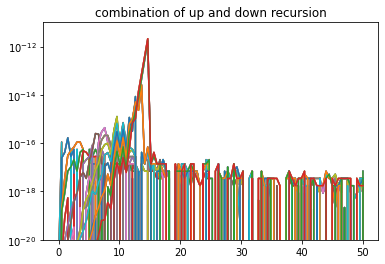

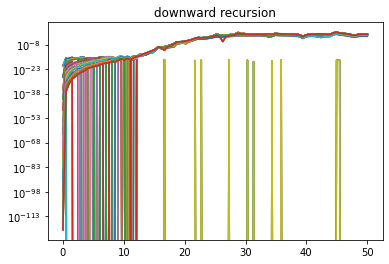

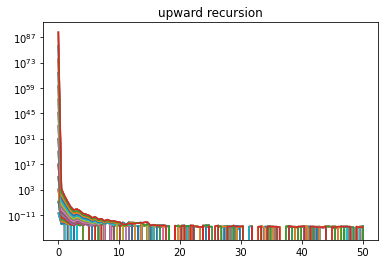

In [16]:
from pylab import *
%matplotlib inline

l=15
x = linspace(1e-6,50,100)
dat0 = array([bessel_upward(l,t) for t in x])
dat1 = array([bessel_downward(l,t) for t in x])
dat2 = array([bessel_j(l,t) for t in x])
date = array([special.spherical_jn(range(l+1),t) for t in x])

for i in range(5,l,3):
    semilogy(x, abs(dat2-date))
title('combination of up and down recursion')
ylim([1e-20,1e-11])

show()

for i in range(5,l,3):
    semilogy(x, abs(dat1-date))
title('downward recursion')
show()

for i in range(5,l,3):
    semilogy(x, abs(dat0-date))
title('upward recursion')
show()
